In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import roc_curve, auc
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

# Data Loading

In [2]:
df1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/4th-Year-Final-Project/Gallbladder_Positive_PPIN.csv")
df2=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/4th-Year-Final-Project/Gallbladder_Negative_PPIN.csv")

# Data Pre-Processing

In [3]:
df1['Label']=1

In [4]:
df1.head()

,Entry,Subgraph,Degree,Eigenvector,Information,LAC,Betweenness,Closeness,Network,Label
0,P00533,5997.4243,87,0.689517,2.237761,0.0,419170.53,0.003325,0.0,1
1,P04637,1900.6320,67,0.057476,2.221138,0.0,472003.16,0.003327,0.0,1
2,Q13526,1521.2914,63,0.018948,2.216633,0.0,474069.06,0.003327,0.0,1
3,Q9NZC7,1086.1158,56,0.047619,2.207276,0.0,258087.05,0.003324,0.0,1
4,Q14847,688.4862,50,0.047851,2.197247,0.0,255992.58,0.003324,0.0,1


In [5]:
df2['Label']=0

In [6]:
df2

,Entry,Subgraph,Degree,Eigenvector,Information,LAC,Betweenness,Closeness,Network,Label
0,O00560,1.970152e+07,294,0.645000,2.192449,0.000000,1140796.400,0.006105,0.000000,0
1,O14964,3.512868e+06,232,0.186330,2.188180,0.000000,844655.100,0.006102,0.000000,0
2,Q13895,1.657689e+06,148,0.181465,2.176651,0.027027,550905.000,0.006092,1.392857,0
3,Q9HC52,4.573537e+05,91,0.095937,2.157176,0.000000,204984.500,0.006077,0.000000,0
4,P14373,2.193707e+05,6,0.067143,1.679466,0.000000,55340.066,0.006095,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
1862,P02454,1.541913e+00,1,0.000000,1.050220,0.000000,0.000,0.000536,0.000000,0
1863,Q13509,1.541668e+00,1,0.000000,1.050220,0.000000,0.000,0.000536,0.000000,0
1864,P62259,1.539505e+00,1,0.000000,1.050220,0.000000,0.000,0.000536,0.000000,0
1865,Q04211,1.538216e+00,1,0.000000,1.050220,0.000000,0.000,0.000536,0.000000,0


In [7]:
df2.describe()

,Subgraph,Degree,Eigenvector,Information,LAC,Betweenness,Closeness,Network,Label
count,1.867000e+03,1867.000000,1867.000000,1867.000000,1867.000000,1.867000e+03,1867.000000,1867.000000,1867.0
mean,2.764295e+04,2.322442,0.009387,1.125907,0.000907,5.841250e+03,0.005570,0.002831,0.0
std,4.652113e+05,11.231317,0.021160,0.185680,0.025677,4.279045e+04,0.001547,0.065947,0.0
min,1.519823e+00,1.000000,0.000000,1.050220,0.000000,0.000000e+00,0.000536,0.000000,0.0
25%,1.523780e+01,1.000000,0.000281,1.050220,0.000000,0.000000e+00,0.006023,0.000000,0.0
50%,2.554250e+02,1.000000,0.001021,1.050220,0.000000,0.000000e+00,0.006046,0.000000,0.0
75%,1.348598e+04,1.000000,0.010725,1.050220,0.000000,0.000000e+00,0.006068,0.000000,0.0
max,1.970152e+07,294.000000,0.645000,2.192449,1.000000,1.140796e+06,0.006105,2.000000,0.0


In [8]:
df2.dtypes

,0
Entry,object
Subgraph,float64
Degree,int64
Eigenvector,float64
Information,float64
LAC,float64
Betweenness,float64
Closeness,float64
Network,float64
Label,int64


In [9]:
merged_df = pd.concat([df1, df2], axis=0)

In [10]:
merged_df

,Entry,Subgraph,Degree,Eigenvector,Information,LAC,Betweenness,Closeness,Network,Label
0,P00533,5997.424300,87,0.689517,2.237761,0.0,419170.53,0.003325,0.0,1
1,P04637,1900.632000,67,0.057476,2.221138,0.0,472003.16,0.003327,0.0,1
2,Q13526,1521.291400,63,0.018948,2.216633,0.0,474069.06,0.003327,0.0,1
3,Q9NZC7,1086.115800,56,0.047619,2.207276,0.0,258087.05,0.003324,0.0,1
4,Q14847,688.486200,50,0.047851,2.197247,0.0,255992.58,0.003324,0.0,1
...,...,...,...,...,...,...,...,...,...,...
1862,P02454,1.541913,1,0.000000,1.050220,0.0,0.00,0.000536,0.0,0
1863,Q13509,1.541668,1,0.000000,1.050220,0.0,0.00,0.000536,0.0,0
1864,P62259,1.539505,1,0.000000,1.050220,0.0,0.00,0.000536,0.0,0
1865,Q04211,1.538216,1,0.000000,1.050220,0.0,0.00,0.000536,0.0,0


In [11]:
df=merged_df.reset_index(drop=True)

In [12]:
df.shape

(3819, 10)

In [13]:
df.drop(['Entry'],axis=1,inplace=True)

In [14]:
df

,Subgraph,Degree,Eigenvector,Information,LAC,Betweenness,Closeness,Network,Label
0,5997.424300,87,0.689517,2.237761,0.0,419170.53,0.003325,0.0,1
1,1900.632000,67,0.057476,2.221138,0.0,472003.16,0.003327,0.0,1
2,1521.291400,63,0.018948,2.216633,0.0,474069.06,0.003327,0.0,1
3,1086.115800,56,0.047619,2.207276,0.0,258087.05,0.003324,0.0,1
4,688.486200,50,0.047851,2.197247,0.0,255992.58,0.003324,0.0,1
...,...,...,...,...,...,...,...,...,...
3814,1.541913,1,0.000000,1.050220,0.0,0.00,0.000536,0.0,0
3815,1.541668,1,0.000000,1.050220,0.0,0.00,0.000536,0.0,0
3816,1.539505,1,0.000000,1.050220,0.0,0.00,0.000536,0.0,0
3817,1.538216,1,0.000000,1.050220,0.0,0.00,0.000536,0.0,0


# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(df[['Entry Name','Subgragh','Degree','Eigenvector','Information','LAC','Betweenness','Closeness','Network']],df['Label'],test_size=0.2,random_state=25)
x_train,x_test,y_train,y_test=train_test_split(df[['Subgraph','Degree','Eigenvector','Information','LAC','Betweenness','Closeness','Network']],df['Label'],test_size=0.2,random_state=25)

In [16]:
x_test

,Subgraph,Degree,Eigenvector,Information,LAC,Betweenness,Closeness,Network
3697,1.689967,1,0.000000,1.050220,0.0,0.0000,0.000537,0.0
3645,2.136314,1,0.000071,1.050220,0.0,0.0000,0.006011,0.0
3422,11.204237,2,0.000397,1.272757,0.0,6812.0000,0.006017,0.0
2448,13485.982000,1,0.010725,1.050220,0.0,0.0000,0.006068,0.0
128,50.202000,19,0.004198,2.059852,0.0,75358.5160,0.003321,0.0
...,...,...,...,...,...,...,...,...
3137,71.161490,2,0.000011,1.272757,0.0,2435.4597,0.006009,0.0
3267,21.900957,1,0.000382,1.050220,0.0,0.0000,0.006034,0.0
2577,5683.551000,1,0.010333,1.050220,0.0,0.0000,0.006058,0.0
2356,13485.982000,1,0.010725,1.050220,0.0,0.0000,0.006068,0.0


In [17]:
len(y_train)

3055

In [18]:
x_train.shape

(3055, 8)

In [19]:
x_train.dtypes

,0
Subgraph,float64
Degree,int64
Eigenvector,float64
Information,float64
LAC,float64
Betweenness,float64
Closeness,float64
Network,float64


In [20]:
x_train

,Subgraph,Degree,Eigenvector,Information,LAC,Betweenness,Closeness,Network
3647,1.993329,1,0.000002,1.050220,0.0,0.000,0.005987,0.0
3123,81.201060,1,0.001021,1.050220,0.0,0.000,0.006043,0.0
2495,8204.665000,3,0.012408,1.423591,0.0,5244.799,0.006067,0.0
2654,628.700260,2,0.001399,1.272757,0.0,29134.299,0.006060,0.0
3515,3.759687,1,0.000001,1.050220,0.0,0.000,0.005974,0.0
...,...,...,...,...,...,...,...,...
3389,14.630484,1,0.000007,1.050220,0.0,0.000,0.005986,0.0
2191,63173.970000,1,0.036447,1.050220,0.0,0.000,0.006071,0.0
2522,5683.551000,1,0.010333,1.050220,0.0,0.000,0.006058,0.0
318,18.741877,1,0.004971,1.069502,0.0,0.000,0.003315,0.0


In [21]:
def Conf(pred):
  from sklearn.metrics import confusion_matrix
  import matplotlib.pyplot as plt
  cm=confusion_matrix(y_test,pred)
  ax=plt.subplot()
  sns.heatmap(cm,annot=True,ax=ax)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  plt.show()

In [22]:
y_train.index

Index([3647, 3123, 2495, 2654, 3515, 1749,  695,  607, 3796,  994,
       ...
       1970, 2988, 1175,  255, 2934, 3389, 2191, 2522,  318, 1156],
      dtype='int64', length=3055)

In [23]:
y_test.index=[*range(len(y_test))]
y_test.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       754, 755, 756, 757, 758, 759, 760, 761, 762, 763],
      dtype='int64', length=764)

# Support Vector Machine

In [24]:
from sklearn.svm import SVC

model_svc = SVC()
model_svc.fit(x_train, y_train)

SVC()

In [25]:
prediction1 = model_svc.predict(x_test)
#calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction1)* 100)
for i in range(len(prediction1)):
    print(y_test[i],prediction1[i])

61.910994764397905
0 1
0 1
0 1
0 1
1 1
0 1
1 1
0 1
1 1
0 0
1 1
0 1
0 1
0 1
0 1
1 1
1 1
0 1
0 0
0 0
1 1
1 1
0 1
1 1
0 1
1 1
1 1
1 1
0 1
0 1
0 1
0 1
0 1
1 1
0 1
0 1
1 1
0 1
1 1
0 1
1 1
0 1
0 1
1 1
0 1
0 1
1 1
1 1
1 1
1 1
1 1
0 0
0 1
0 1
1 1
1 1
0 1
1 1
1 1
1 1
0 1
0 1
0 0
0 1
1 1
1 1
0 0
1 1
0 0
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 1
1 1
0 0
0 1
1 1
0 1
1 1
0 0
1 1
1 1
1 1
0 1
1 1
1 1
1 1
0 0
0 1
0 1
1 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
1 1
0 0
1 1
1 1
0 1
1 1
1 1
1 1
0 1
0 1
1 1
0 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
0 1
0 1
0 0
0 1
0 1
0 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
0 1
0 1
0 1
0 1
1 1
0 1
1 1
1 1
1 1
0 0
0 1
0 0
0 1
0 1
0 1
0 1
0 1
0 1
1 1
1 1
0 1
1 1
0 1
1 1
1 1
1 1
0 1
1 1
1 1
0 1
0 0
0 1
0 1
0 0
1 1
1 1
0 1
1 1
0 1
0 1
1 1
1 1
0 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
0 1
1 1
0 1
0 1
1 1
1 1
0 1
1 1
0 0
0 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
0 0
0 1
1 1
0 1
0 1
1 1
0 1
1 1
1 1
0 1
1 1
0 1
0 1
0 1
1 1
0 0
1 1
0 1
1 1
1 1
1 1
1 1
1 1
0 1
0 1
1

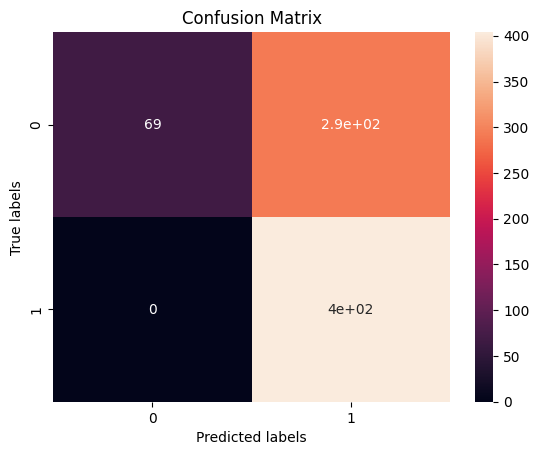

In [26]:
Conf(prediction1)

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
prediction2 = model_LR.predict(x_test)
#Calculate the accuracy
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test, prediction2)* 100)
for i in range(len(prediction1)):
  print(y_test[i], prediction1[i])

83.24607329842932
0 1
0 1
0 1
0 1
1 1
0 1
1 1
0 1
1 1
0 0
1 1
0 1
0 1
0 1
0 1
1 1
1 1
0 1
0 0
0 0
1 1
1 1
0 1
1 1
0 1
1 1
1 1
1 1
0 1
0 1
0 1
0 1
0 1
1 1
0 1
0 1
1 1
0 1
1 1
0 1
1 1
0 1
0 1
1 1
0 1
0 1
1 1
1 1
1 1
1 1
1 1
0 0
0 1
0 1
1 1
1 1
0 1
1 1
1 1
1 1
0 1
0 1
0 0
0 1
1 1
1 1
0 0
1 1
0 0
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 1
1 1
0 0
0 1
1 1
0 1
1 1
0 0
1 1
1 1
1 1
0 1
1 1
1 1
1 1
0 0
0 1
0 1
1 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
1 1
0 0
1 1
1 1
0 1
1 1
1 1
1 1
0 1
0 1
1 1
0 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
0 1
0 1
0 0
0 1
0 1
0 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
0 1
0 1
0 1
0 1
1 1
0 1
1 1
1 1
1 1
0 0
0 1
0 0
0 1
0 1
0 1
0 1
0 1
0 1
1 1
1 1
0 1
1 1
0 1
1 1
1 1
1 1
0 1
1 1
1 1
0 1
0 0
0 1
0 1
0 0
1 1
1 1
0 1
1 1
0 1
0 1
1 1
1 1
0 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
0 1
1 1
0 1
0 1
1 1
1 1
0 1
1 1
0 0
0 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
0 0
0 1
1 1
0 1
0 1
1 1
0 1
1 1
1 1
0 1
1 1
0 1
0 1
0 1
1 1
0 0
1 1
0 1
1 1
1 1
1 1
1 1
1 1
0 1
0 1
1 

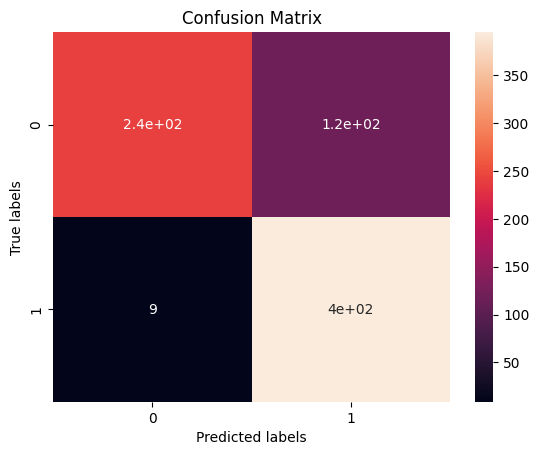

In [29]:
Conf(prediction2)

# Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
model_DTC = DecisionTreeClassifier()
model_DTC.fit(x_train, y_train)

DecisionTreeClassifier()

In [31]:
prediction3 = model_DTC.predict(x_test)
#Calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction3))

1.0


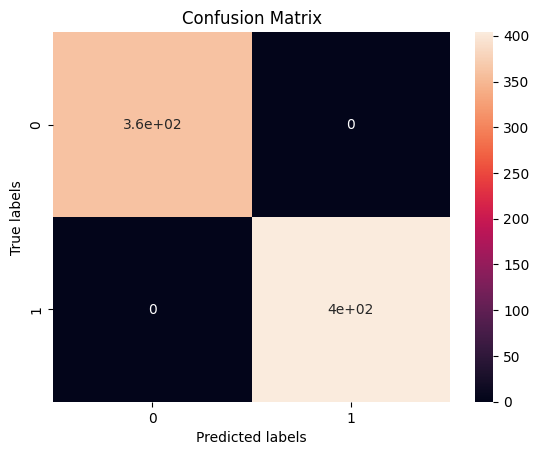

In [32]:
Conf(prediction3)

# Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier()
model_RF.fit(x_train, y_train)

RandomForestClassifier()

In [34]:
prediction4 = model_RF.predict(x_test)
#Calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction4))

1.0


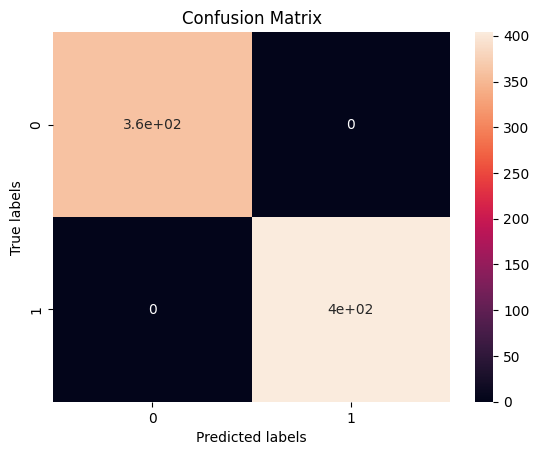

In [35]:
Conf(prediction4)

# Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()
model_NB.fit(x_train, y_train)

GaussianNB()

In [37]:
prediction5 = model_NB.predict(x_test)
#Calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction5))

0.7159685863874345


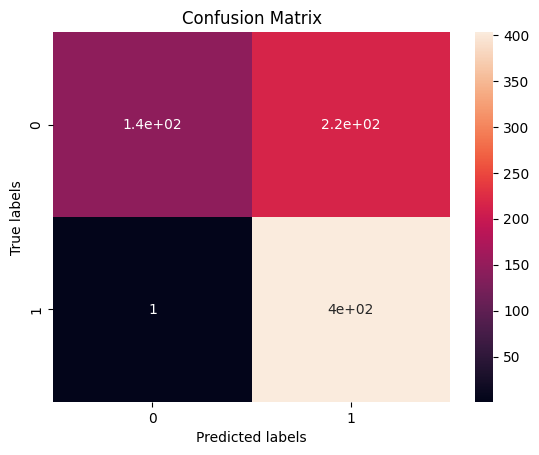

In [38]:
Conf(prediction5)

# K-Nearest Neighbour

In [39]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier()
model_KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [40]:
prediction6 = model_KNN.predict(x_test)
#Calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction6))

0.9594240837696335


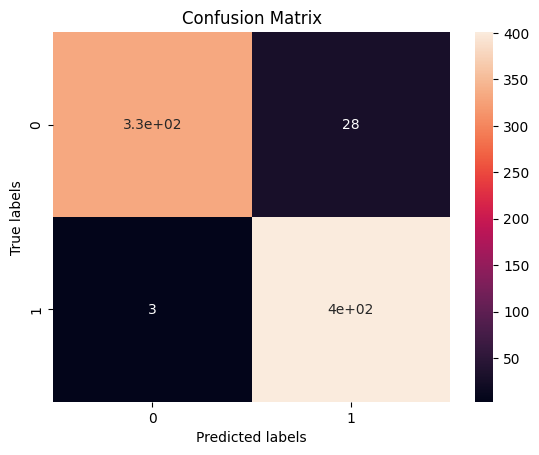

In [41]:
Conf(prediction6)

# XGBoost

In [42]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
dtrain=xgb.DMatrix(x_train, label=y_train)
params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'learning_rate': 0.1,
    'max_depth': 10,
    'alpha': 10
}
model_XGB = xgb.train(params=params, dtrain=dtrain, num_boost_round=100)
dtest=xgb.DMatrix(x_test)

In [43]:
prediction7 = model_XGB.predict(dtest)
#Calculate the accuracy
y_test = le.fit_transform(y_test)
accuracy=sum(prediction7==y_test)/len(y_test)
print(accuracy)

1.0


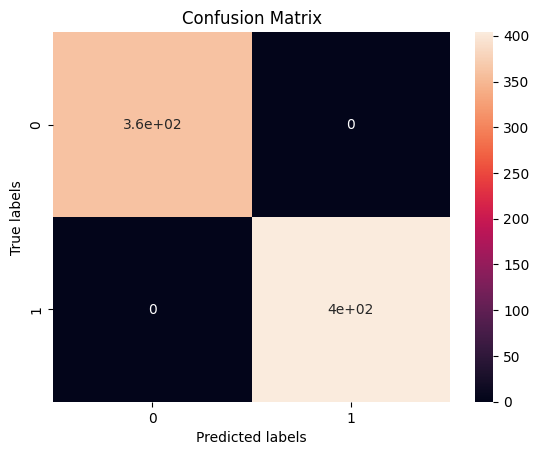

In [44]:
Conf(prediction7)

# AdaBoost

In [45]:
from sklearn.ensemble import AdaBoostClassifier
model_ADB = AdaBoostClassifier(n_estimators=100)
model_ADB.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [46]:
prediction8 = model_ADB.predict(x_test)
#Calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction8))

1.0


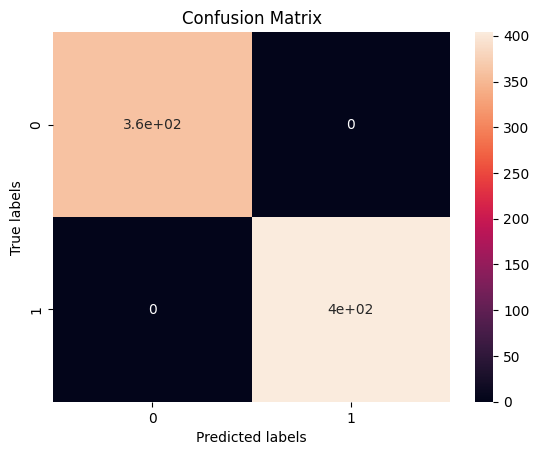

In [47]:
Conf(prediction8)

# Sequential Deep Learning

In [49]:
model = keras.Sequential([
    keras.layers.Dense(26, input_dim=8, activation='softmax'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='relu')

])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=200)

Epoch 1/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5062 - loss: 3.0188
Epoch 2/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4957 - loss: 2.4723
Epoch 3/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5417 - loss: 2.3428
Epoch 4/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6951 - loss: 2.3109
Epoch 5/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7034 - loss: 2.1523
Epoch 6/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7055 - loss: 2.1645
Epoch 7/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6988 - loss: 2.2428
Epoch 8/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7167 - loss: 2.1794
Epoch 9/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7134 - loss: 2.1517
Epoch 10/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7061 - loss: 2.2148
Epoch 11/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7072 - loss: 2.2521
Epoch 12/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [50]:
predictions = model.predict(x_test)
conf_matrix = tf.math.confusion_matrix(labels=y_test, predictions=predictions)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


# ROC Curve

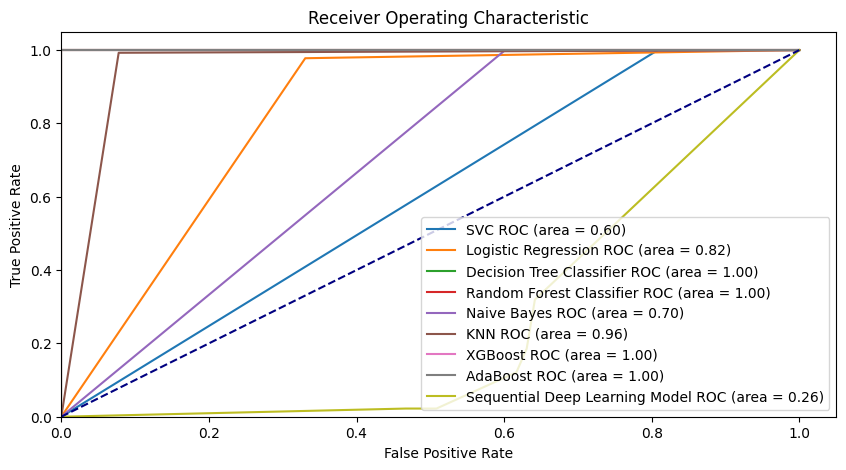

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define a list to store ROC data
roc_data = []

# Define a function to calculate ROC data
def calc_roc(y_test, pred, model_name):
    fpr, tpr, _ = roc_curve(y_test.astype(int), pred.astype(int))
    roc_auc = auc(fpr, tpr)
    roc_data.append((fpr, tpr, roc_auc, model_name))

# Calculate ROC data for each model
calc_roc(y_test, prediction1, 'SVC')
calc_roc(y_test, prediction2, 'Logistic Regression')
calc_roc(y_test, prediction3, 'Decision Tree Classifier')
calc_roc(y_test, prediction4, 'Random Forest Classifier')
calc_roc(y_test, prediction5, 'Naive Bayes')
calc_roc(y_test, prediction6, 'KNN')
calc_roc(y_test, prediction7, 'XGBoost')
calc_roc(y_test, prediction8, 'AdaBoost')
calc_roc(y_test, predictions, 'Sequential Deep Learning Model')
# and so on for each model...

# Plot all ROC curves on the same graph
plt.figure(figsize=(10,5))

for fpr, tpr, roc_auc, model_name in roc_data:
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (model_name, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()